In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib tensorflowjs

In [2]:
import os                  
import time                
import numpy as np          
import cv2                  
import mediapipe as mp      
from matplotlib import pyplot as plt  

In [3]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb.flags.writeable = False
    results = model.process(image_rgb)
    image_rgb.flags.writeable = True
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    return image_bgr, results

In [5]:
def draw_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_holistic.FACEMESH_TESSELATION
        )

    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS
        )

    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )

    # Draw right hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections with specified styles
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )

    # Draw pose connections with specified styles
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )

    # Draw left hand connections with specified styles
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )

    # Draw right hand connections with specified styles
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

In [7]:
cap = cv2.VideoCapture(0)

# Set up Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame from the camera feed
        ret, frame = cap.read()
        if not ret:  # Check if frame was captured successfully
            print("Failed to grab frame.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks on the image
        draw_styled_landmarks(image, results)

        # Display the processed image
        cv2.imshow('OpenCV Feed', image)

        # Exit the loop if 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

C:\Users\tshak\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

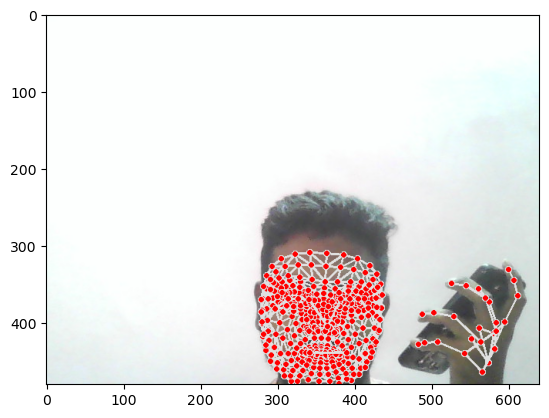

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [10]:
def extract_keypoints(results):
    # Extract pose landmarks
    pose = (
        np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] 
                   for landmark in results.pose_landmarks.landmark]).flatten()
        if results.pose_landmarks else np.zeros(33 * 4)
    )
    
    # Extract face landmarks
    face = (
        np.array([[landmark.x, landmark.y, landmark.z] 
                   for landmark in results.face_landmarks.landmark]).flatten()
        if results.face_landmarks else np.zeros(468 * 3)
    )
    
    # Extract left hand landmarks
    lh = (
        np.array([[landmark.x, landmark.y, landmark.z] 
                   for landmark in results.left_hand_landmarks.landmark]).flatten()
        if results.left_hand_landmarks else np.zeros(21 * 3)
    )
    
    # Extract right hand landmarks
    rh = (
        np.array([[landmark.x, landmark.y, landmark.z] 
                   for landmark in results.right_hand_landmarks.landmark]).flatten()
        if results.right_hand_landmarks else np.zeros(21 * 3)
    )
    
    # Concatenate all keypoints into a single array
    return np.concatenate([pose, face, lh, rh])

# Setup Folders for Collection

In [11]:
# Path for exported data (NumPy arrays)
DATA_PATH = os.path.join('MP_Data')

# Actions to be detected
actions = np.array(['Hello', 'hai', 'help'])

# Number of sequences (videos) to collect
num_sequences = 30

# Length of each video sequence (in frames)
sequence_length = 30

# Starting folder index for data collection
start_folder = 30

In [12]:
# Define signs to be created as folders
signs = ['Hello', 'hai', 'help']

# Parent folder path
parent_folder = 'MP_Data'

# Create the parent folder if it does not exist
if not os.path.exists(parent_folder):
    os.mkdir(parent_folder)  # Create the parent folder
    # Create subfolders for each sign
    for sign in signs:
        sign_folder = os.path.join(parent_folder, sign)
        os.mkdir(sign_folder)  # Create folder for each sign
        
        # Create 30 subfolders for each sign
        for i in range(30):
            subfolder = os.path.join(sign_folder, str(i))
            os.mkdir(subfolder)  # Create subfolder for each sequence

# Collect Keypoint Values for Training and Testing

In [13]:
# Import necessary libraries
import os
import numpy as np
import cv2
import mediapipe as mp

# Define parameters for data collection
actions = np.array(['Hello', 'hai', 'help'])  # Actions to detect
no_sequences = 30          # Number of videos for each action
sequence_length = 30      # Number of frames in each video
DATA_PATH = os.path.join('MP_Data')  # Path for exported data

# Initialize video capture
cap = cv2.VideoCapture(0)

# Set up Mediapipe holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Create directory for the action if it doesn't exist
        action_folder = os.path.join(DATA_PATH, action)
        if not os.path.exists(action_folder):
            os.makedirs(action_folder)
        
        # Loop through sequences (videos)
        for sequence in range(no_sequences):
            # Create directory for the sequence if it doesn't exist
            sequence_folder = os.path.join(action_folder, str(sequence))
            if not os.path.exists(sequence_folder):
                os.makedirs(sequence_folder)

            # Loop through each frame in the video
            for frame_num in range(sequence_length):
                # Read the video feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Show information on the frame
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(sequence_folder, str(frame_num) + '.npy')  # Add '.npy' extension
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Example data
X = np.random.rand(100, 20)  # 100 samples, 20 features
y = np.random.randint(0, 3, 100)  # 100 labels for 3 classes (0, 1, 2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape (one-hot):", y_train_categorical.shape)

X_train shape: (80, 20)
y_train shape (one-hot): (80, 3)


In [15]:
actions = np.array(['Hello', 'hai', 'help'])  # Define your actions

# Create a label map
label_map = {label: num for num, label in enumerate(actions)}

print(label_map)

{'Hello': 0, 'hai': 1, 'help': 2}


In [16]:
sequences, labels = [], []

# Loop through each action
for action in actions:
    # Loop through each sequence directory (assuming sequence names are integers)
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        # Loop through the frames in the current sequence
        for frame_num in range(sequence_length):
            # Load the keypoints for each frame
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        # Append the sequence of keypoints to sequences list
        sequences.append(window)
        # Append the corresponding label to labels list
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\Hello\\12\\18.npy'

In [17]:
X = np.array(sequences)

In [18]:
y = to_categorical(labels).astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Build and Train LSTM Neural Network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
#While training access tensorboard
#tensorboard --logdir=.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))  # First LSTM layer
model.add(LSTM(128, return_sequences=True, activation='relu'))  # Second LSTM layer
model.add(LSTM(64, return_sequences=False, activation='relu'))  # Third LSTM layer

# Add Dense layers
model.add(Dense(64, activation='relu'))  # First Dense layer
model.add(Dense(32, activation='relu'))  # Second Dense layer
model.add(Dense(len(actions), activation='softmax'))  # Output layer for classification

In [23]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

In [24]:
# Train the model
model.fit(X_train, y_train, 
          epochs=2000, 
          callbacks=[tb_callback],
          validation_data=(X_test, y_test))

Epoch 1/2000


ValueError: in user code:

    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

C:\Users\tshak\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


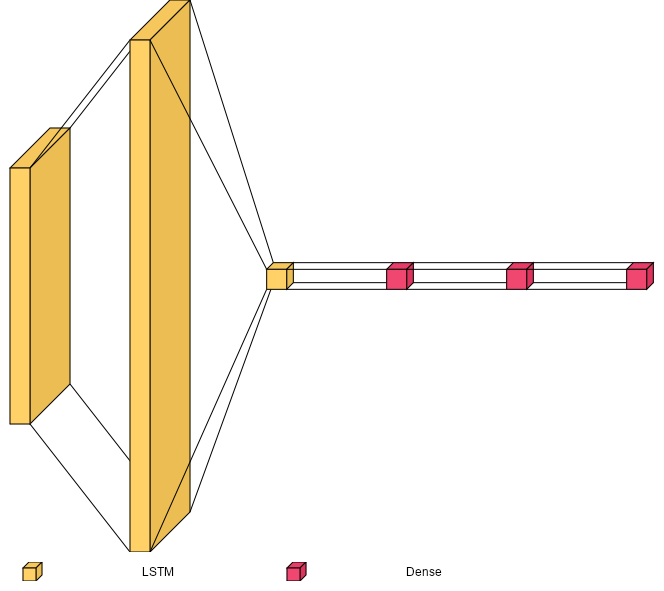

In [26]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)

# Visualize the Keras model architecture
visualkeras.layered_view(model, 
                         legend=True, 
                         font=font, 
                         spacing=100)

# Make Predictions

In [27]:
res = model.predict(X_test)

1/1 [==============================] - 1s 758ms/step


In [28]:
actions[np.argmax(res[4])]

IndexError: index 4 is out of bounds for axis 0 with size 1

In [29]:
actions[np.argmax(y_test[4])]

IndexError: index 4 is out of bounds for axis 0 with size 1

# Save Weights

In [30]:
# Save the entire model
model.save('./model.h5')

# Save only the weights (ensure the filename ends with .weights.h5)
model.save_weights('./model_weights.weights.h5')

C:\Users\tshak\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
del model

In [32]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

In [33]:
model.load_weights('model_weights.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Evaluation using Confusion Matrix

In [34]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Assuming you have your model and test data loaded
# Replace with your actual test data and predictions
y_test = np.array([[1, 0, 1], [0, 1, 0], [1, 1, 0]])  # Example true labels (multilabel)
y_pred = np.array([[1, 0, 0], [0, 1, 1], [1, 1, 0]])  # Example predictions

# Compute confusion matrix
confusion_mtx = multilabel_confusion_matrix(y_test, y_pred)
print("Multilabel Confusion Matrix:")
print(confusion_mtx)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

Multilabel Confusion Matrix:
[[[1 0]
  [0 2]]

 [[1 0]
  [0 2]]

 [[1 1]
  [1 0]]]


In [35]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 551ms/step


In [36]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

# Realtime Test

In [37]:
from scipy import stats

In [38]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [39]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

signs = ['hello', 'thanks', 'help']
actions = np.array(['hello', 'thanks', 'help'])


mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])
    
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

model = tf.keras.models.load_model('model.h5')
model.load_weights('model_weights.h5')
model.summary()

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

       
        ret, frame = cap.read()

        
        image, results = mediapipe_detection(frame, holistic)
       
        draw_styled_landmarks(image, results)
       
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('Realtime LSTM Sign Language Detection', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)